In [18]:
import pandas as pd 
%matplotlib inline
url = 'WR.csv'
url2 = 'COF.csv'
url3 = 'COF_new.csv'
url4 = 'WR_new.csv'
col_names = ['LOAD','SPEED','kurtosis' ,'Mean', 'Skew' ,'standard_DEV' ,'Variance' ,'RMS' ,'peak2peak' ,'peak2rms' ,'Sum']
pima_WR = pd.read_csv(url, header=None, names=col_names)
pima_COF = pd.read_csv(url2, header=None, names=col_names)

mima_WR = pd.read_csv(url4, header=None, names=col_names)
mima_COF = pd.read_csv(url3, header=None, names=col_names)

In [19]:
cluster_wr=pima_WR[['kurtosis' ,'Mean', 'Skew' ,'standard_DEV' ,'Variance' ,'RMS' ,'peak2peak' ,'peak2rms' ,'Sum']]
cluster_cof = pima_COF[['kurtosis' ,'Mean', 'Skew' ,'standard_DEV' ,'Variance' ,'RMS' ,'peak2peak' ,'peak2rms' ,'Sum']]
cluster_wr_new=mima_WR[['kurtosis' ,'Mean', 'Skew' ,'standard_DEV' ,'Variance' ,'RMS' ,'peak2peak' ,'peak2rms' ,'Sum']]
cluster_cof_new = mima_COF[['kurtosis' ,'Mean', 'Skew' ,'standard_DEV' ,'Variance' ,'RMS' ,'peak2peak' ,'peak2rms' ,'Sum']]

In [20]:
# Elbow criterion
def elbow_plot(data, maxK=10, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

('k: ', 1)
('k: ', 2)


/home/nishu/kerai/lib/python2.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


('k: ', 3)
('k: ', 4)
('k: ', 5)
('k: ', 6)
('k: ', 7)
('k: ', 8)
('k: ', 9)


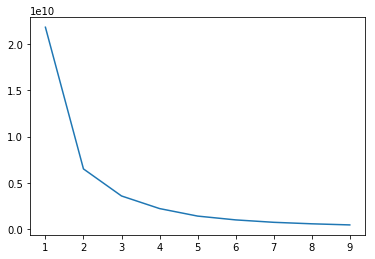

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
elbow_plot(cluster_wr, maxK=10)

('k: ', 1)
('k: ', 2)


/home/nishu/kerai/lib/python2.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


('k: ', 3)
('k: ', 4)
('k: ', 5)
('k: ', 6)
('k: ', 7)
('k: ', 8)
('k: ', 9)


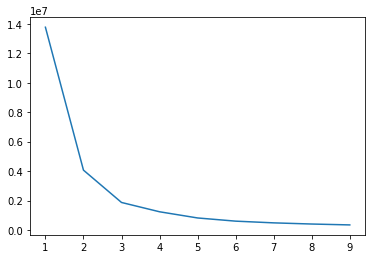

In [22]:
elbow_plot(cluster_cof, maxK=10)

('k: ', 1)
('k: ', 2)


/home/nishu/kerai/lib/python2.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


('k: ', 3)
('k: ', 4)
('k: ', 5)
('k: ', 6)
('k: ', 7)
('k: ', 8)
('k: ', 9)


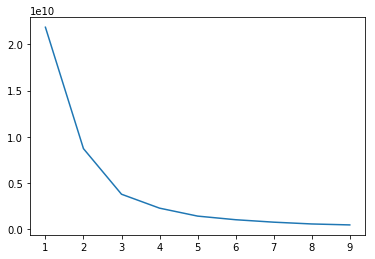

In [23]:
elbow_plot(cluster_wr_new, maxK=10)

('k: ', 1)
('k: ', 2)


/home/nishu/kerai/lib/python2.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


('k: ', 3)
('k: ', 4)
('k: ', 5)
('k: ', 6)
('k: ', 7)
('k: ', 8)
('k: ', 9)


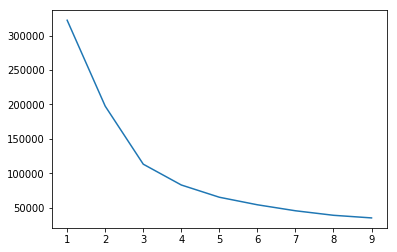

In [24]:
elbow_plot(cluster_cof_new, maxK=10)

In [25]:
K_M = KMeans(n_clusters=3, init='k-means++', n_init=100)
K_M.fit(cluster_wr)
K_Mean = KMeans(n_clusters=3, init='k-means++', n_init=100)
K_Mean.fit(cluster_cof)
K_M_new = KMeans(n_clusters=3, init='k-means++', n_init=100)
K_M_new.fit(cluster_wr_new)
K_Mean_new = KMeans(n_clusters=3, init='k-means++', n_init=100)
K_Mean_new.fit(cluster_cof_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=100, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
pima_WR['Cluster'] = K_M.labels_
pima_COF['Cluster'] = K_Mean.labels_
mima_WR['Cluster'] = K_M_new.labels_
mima_COF['Cluster'] = K_Mean_new.labels_

In [9]:
x=K_M.fit_predict(cluster_wr)
y=K_Mean.fit_predict(cluster_cof)
x_new=K_M.fit_predict(cluster_wr_new)
y_new=K_Mean.fit_predict(cluster_cof_new)
pima_WR["Cluster"] = x
pima_COF["Cluster"] = y

mima_WR["Cluster"] = x_new
mima_COF["Cluster"] = y_new

In [10]:
pima_WR

,LOAD,SPEED,kurtosis,Mean,Skew,standard_DEV,Variance,RMS,peak2peak,peak2rms,Sum,Cluster
0,2.0,400,107.816728,34.083191,-9.246727,-9.246727,4.849935,34.154266,32.8400,1.062532,20824.83000,0
1,2.0,410,96.937507,33.524907,-8.297813,-8.297813,13.295387,33.741462,33.9530,1.110211,19737.00900,0
2,2.0,420,86.058287,32.966622,-7.348899,-7.348899,21.740840,33.328657,35.0660,1.157890,18649.18800,0
3,2.0,430,75.179067,32.408337,-6.399985,-6.399985,30.186292,32.915853,36.1790,1.205569,17561.36700,0
4,2.0,440,64.299846,31.850052,-5.451070,-5.451070,38.631744,32.503049,37.2920,1.253248,16473.54600,2
5,2.0,450,53.420626,31.291768,-4.502156,-4.502156,47.077197,32.090244,38.4050,1.300927,15385.72500,2
6,2.0,460,42.541405,30.733483,-3.553242,-3.553242,55.522649,31.677440,39.5180,1.348605,14297.90400,2
7,2.0,470,31.662185,30.175198,-2.604328,-2.604328,63.968101,31.264636,40.6310,1.396284,13210.08300,2
8,2.0,480,20.782964,29.616913,-1.655414,-1.655414,72.413554,30.851831,41.7440,1.443963,12122.26200,2
9,2.0,490,9.903744,29.058629,-0.706500,-0.706500,80.859006,30.439027,42.8570,1.491642,11034.44100,2


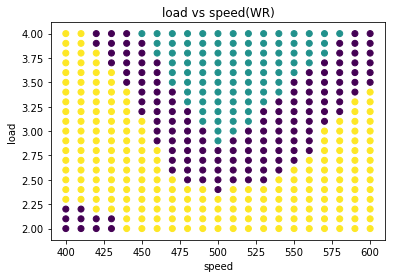

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(x=pima_WR["SPEED"], y=pima_WR["LOAD"], c=pima_WR["Cluster"])
plt.title('load vs speed(WR)')
plt.xlabel('speed')
plt.ylabel('load')
plt.show()

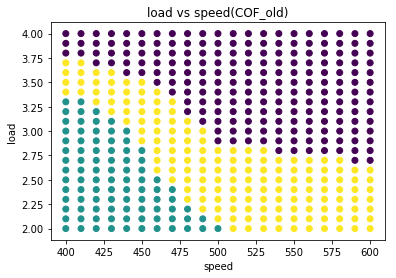

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(x=pima_COF["SPEED"], y=pima_COF["LOAD"], c=pima_COF["Cluster"])
plt.title('load vs speed(COF_old)')
plt.xlabel('speed')
plt.ylabel('load')
plt.show()

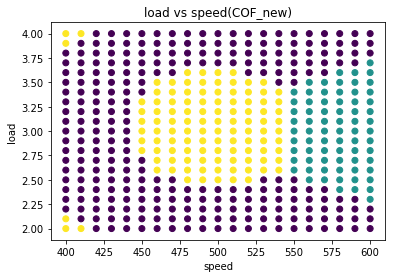

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(x=mima_COF["SPEED"], y=mima_COF["LOAD"], c=mima_COF["Cluster"])
plt.title('load vs speed(COF_new)')
plt.xlabel('speed')
plt.ylabel('load')
plt.show()

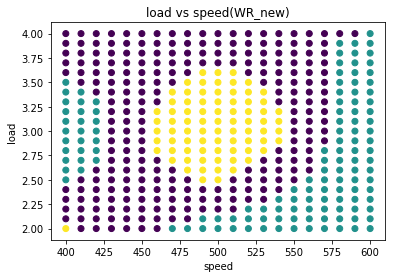

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(x=mima_WR["SPEED"], y=mima_WR["LOAD"], c=mima_WR["Cluster"])
plt.title('load vs speed(WR_new)')
plt.xlabel('speed')
plt.ylabel('load')
plt.show()

In [17]:
#mima_WR.to_csv('WR_new_cluster.csv')
#mima_COF.to_csv('COF_new_cluster.csv')
pima_WR.to_csv('WR_old_cluster.csv')
pima_COF.to_csv('COF_old_cluster.csv')
    